In [6]:
import re
import json
import uuid
import glob
import pickle
import sys
import os
import math
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.cluster import KMeansClusterer, euclidean_distance
from numpy import array
from pprint import pprint
import re
import scipy.stats as stat
from os.path import basename
import string
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('agg')
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import operator
from nltk import stem
from nltk.stem.snowball import *
from nltk.stem import PorterStemmer
import datetime
import time
from pprint import pprint
from gensim.corpora.dictionary import Dictionary

%matplotlib inline
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
import os

# Enable logging for gensim - optional
import logging
logging.basicConfig(filename='lda_model_Mommit.log',format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")


def Tokinization(document):
    document = "".join(document)
    tokenizer = RegexpTokenizer(r'\w+')
    intermediate = tokenizer.tokenize(document)
    return intermediate


In [7]:
df= pd.read_pickle('Mizo_LDA_70_Topics.pkl')

In [8]:
#stripping all r/Parenting related columns that are not useful here...
df_text = df[['body', 'clean_body','subreddit','author','created_utc','link_id','name','parent_id','score','Throwaway']]

In [9]:
df_text.head()

,body,clean_body,subreddit,author,created_utc,link_id,name,parent_id,score,Throwaway
0,Great tips.,great tip,Parenting,None,2008-03-31 12:44:58,t3_6e0oe,t1_c03l6im,t3_6e0oe,1,False
1,Now you tell me. :-(,tell :-,Parenting,kickstand,2008-04-09 15:16:05,t3_6d8mw,t1_c03o5z1,t3_6d8mw,1,False
2,"At our house, the tooth fairy leaves one shiny $1 coin with a dead white President's face on it.\n\nhttp://www.usmint.gov/mint_programs/$1coin/index.cfm?flash=yes",hous tooth fairi leav one shini coin dead white presid face usmint gov mint program coin index cfm flash=y,Parenting,kickstand,2008-04-09 15:17:46,t3_6d8mh,t1_c03o5zp,t3_6d8mh,1,False
3,"Whatever you do, don't make reading a chore. It's the most fun thing in the world, treat it as such.",whatev make read chore fun thing world treat,Parenting,kickstand,2008-05-08 19:14:57,t3_6ikpd,t1_c03y7ux,t3_6ikpd,1,False
4,"Formula ""gift"" bags should be illegal.",formula gift bag illeg,Parenting,None,2008-06-23 14:50:48,t3_6okju,t1_c04g7f8,t3_6okju,2,False


In [10]:
#Creating a Daddit Data Frame
Mommit = df_text[df_text['subreddit']=='Mommit']

In [11]:
Mommit.head()

,body,clean_body,subreddit,author,created_utc,link_id,name,parent_id,score,Throwaway
2795,Love all of these!,love,Mommit,C5Cane,2010-09-04 06:08:56,t3_d9ev7,t1_c0yiueg,t3_d9ev7,2,False
2797,Weed.,weed,Mommit,heyfella,2010-09-04 06:55:40,t3_d9g7x,t1_c0yiwzh,t3_d9g7x,2,False
2798,"Use the money to buy baby gift baskets ( call it the stork basket) for poor moms.. You can even have these mom-to-be come in, learn something for the care of their baby ( dvds, games, chats) and earn mom points for these baskets",use money buy babi gift basket call stork basket poor mom even mom-to-b come learn someth care babi dvd game chat earn mom point basket,Mommit,aprilwine,2010-09-04 07:13:13,t3_d9g7x,t1_c0yixv6,t3_d9g7x,4,False
2801,"Throw out your ""plan"" and just go with it. Sure, you could get pregnant the first month off the IUD, but it usually takes a few months even for perfectly healthy couples. Don't count on your Halloween baby. ""The crazy crying period"" is called postpartum depression and not all new mothers get it. I never did. If you are afraid of getting frustrated with your child and you haven't even gotten pregnant yet, you may want to re-evaluate if you are really ready for a child. All new mothers need a support network. Get out and join moms groups in your area to meet other moms and babies to play with, especially if you are planning to become a SAHM. Also, don't map out a birth plan...none of them go as expected...babies have their own plans.",throw plan go sure could get pregnant first month iud usual take month even perfectli healthi coupl count halloween babi crazi cri period call postpartum depress new mother get never afraid get frustrat child even gotten pregnant yet may want re-evalu realli readi child new mother need support network get join mom group area meet mom babi play especi plan b e sahm also map birth plan none go expect babi plan,Mommit,ChikNugs,2010-09-04 19:52:43,t3_d9mge,t1_c0yk3jj,t3_d9mge,3,False
2802,"We are going to start trying to get pregnant in a few months or so. (There is something beyond our control right now causing the fuzzy and slightly unknown time frame.) Besides being afraid of labor, how crazy my mother is and will be, the sudden involvement of family neither of us really see or talk to, and the hormones I'm the most worried about once I give birth and we settle into a routine will I feel like I'm on house arrest? So far I'm making a mental list of things I hope to do with our little one outside of our home. While he/she is still pretty small and not really mobile yet I'm hoping to get into some new mother groups and find a mommy centric yoga class and an infant exercise/bonding class. Once he/she's a toddler then trips to the zoo and family day at the art museum.\n\n\nAfter my sister-in-law had her baby she turned into an avid Facebook user. I believe it was her way of staying in contact with her friends and filling the void of not being away from home everyday interacting with a lot people. Maybe you and your friends already use Facebook. As long as you don't overload your updates about your little one it seems like a nice way to stay in the loop. Emails and texts just feel like they need to be responded to too quickly and sometimes phone calls come at the worst time possible. \n\n\nI hope everything works out so your baby is born in October. I was sort of hoping to not be in my second or third trimester in the summer, but the way things are going we are going to have a fall or winter baby, too. Any thoughts on being pregnant during the summer? The heat and humidity already zaps all my energy to begin with. So, I can't imagine being 25 pounds heavier and short of breath when the heat index is 100.",go start tri get pregnant month someth beyond control right caus fuzzi slightli unknown time frame besid afraid labor crazi mother sudden involv famili neither us realli see talk hormon worri give birth settl routin feel like hous arrest far make mental list thing hope littl one outsid ho

In [4]:
print('reading the Mommit Cleaned dataframe...')
print('*' * 50)
print('and for a test...')
print(Mommit.clean_body.head())
print('*' * 50)

reading the Mommit Cleaned dataframe...
**************************************************
and for a test...
1038051                                                 love
1038053                                                 weed
1038054    use money buy babi gift basket call stork bask...
1038057    throw plan go sure could get pregnant first mo...
1038058    go start tri get pregnant month someth beyond ...
Name: clean_body, dtype: object
**************************************************


In [5]:
print('grouping into dcouments')
CompleteThread = []
CompleteThread = Mommit.groupby('link_id')['clean_body'].apply(list)
#running for the rest of the data
processed_threads = []
#creating threads for each of the users
for thread in CompleteThread:
    #Preprocessing each of the threads
    processed_threads.append(Tokinization(thread))

grouping into dcouments


In [6]:
texts = processed_threads
print('The length of the documents is...')
print(len(texts))
print('*' * 50)
print('the first document is...')
print(texts[0])
print('*' * 50)

print('buiding the dictionary...')
dictionary = corpora.Dictionary(texts)
dictionary.save('MommitDictionary.dict')
print(dictionary[0])

print('building the corpus')
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('MommitCorpusFinal.mm', corpus)
print(corpus[0])

The length of the documents is...
17399
**************************************************
the first document is...
['childless', 'choic', 'year', 'still', 'especi', 'fond', 'peopl', 'kid', 'kind', 'hard', 'like', 'believ', 'readi', 'tri', 'child', 'eight', 'year', 'fantast', 'support', 'partner', 'knew', 'would', 'great', 'dad', 'want', 'kid', 'badli', 'never', 'heartbroken', 'feel', 'readi', 'mom', 'daughter', 'decis', 'made', 'lightli', 'scare', 'throughout', 'entir', 'pregnanc', 'would', 'aw', 'parent', 'mess', 'littl', 'three', 'seem', 'pretti', 'wellmet', 'husband', 'bare', 'went', 'whirlwind', 'romanc', 'involv', 'lot', 'sex', 'never', 'care', 'thank', 'pass', 'std', 'hiv', 'test', 'told', 'kid', 'born', 'hypospadia', 'googl', 'risk', 'pco', 'know', 'time', 'continu', 'use', 'protect', 'total', 'four', 'year', 'went', 'diet', 'exercis', 'regim', 'lost', 'pound', 'start', 'ovul', 'boom', 'got', 'pregnant', 'unexpectedli', 'alway', 'said', 'okay', 'never', 'kid', 'thought', 'secre

limit_output extension: Maximum message size of 10000 exceeded with 11602 characters

In [7]:
print('reading all LDA models....')
print('*' * 50)

model_list =  []

coherence_values = []

for i in range(0, len(model_list)):
    print('now working on coherence value for model...')
    print(model_list[i])
    print('*' * 50)
    coherencemodel = CoherenceModel(model=model_list[i], texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

reading all LDA models....
**************************************************


In [8]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [9]:
from gensim.models import LdaModel
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=10, limit=100, step=10)

/Users/tammari/Desktop/DaskTest/env/lib/python3.6/site-packages/scipy/sparse/lil.py:504: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/Users/tammari/Desktop/DaskTest/env/lib/python3.6/site-packages/scipy/sparse/lil.py:506: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


In [10]:
limit = 100
start = 10
step  = 10    

x = range(start, limit, step)
coherence = zip(x, coherence_values)
sorted_coherence = sorted(coherence, key=lambda x: x[1], reverse=True)

print(sorted_coherence)
print('*' * 50)

for m, cv in sorted_coherence:
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
print('saving list...')
print('*' * 50)
with open("Mommit_cohere.pkl", "wb") as fp: 
    pickle.dump(sorted_coherence, fp)
    
print('creating a graph of the coherence model...')
print('*' * 50)

# Show graph
fig = plt.gcf()
limit=limit; start=start; step=step;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
fig.savefig('Mommit_LDA_models_coherence.png')

[(50, 0.3723073201834858), (60, 0.3584696938337278), (80, 0.35344258290129604), (30, 0.3527240830563468), (70, 0.3451880728465597), (90, 0.3434842602732379), (40, 0.3371560677325858), (20, 0.3279863377063672), (10, 0.29906741373226675)]
**************************************************
Num Topics = 50  has Coherence Value of 0.3723
Num Topics = 60  has Coherence Value of 0.3585
Num Topics = 80  has Coherence Value of 0.3534
Num Topics = 30  has Coherence Value of 0.3527
Num Topics = 70  has Coherence Value of 0.3452
Num Topics = 90  has Coherence Value of 0.3435
Num Topics = 40  has Coherence Value of 0.3372
Num Topics = 20  has Coherence Value of 0.328
Num Topics = 10  has Coherence Value of 0.2991
saving list...
**************************************************
creating a graph of the coherence model...
**************************************************


In [11]:
for i in range(0,len(model_list)):
    model_list[i].save('Mommit_Model'+str(i)+".model")

In [9]:
limit = 100
start = 10
step  = 10  

with open('Mommit_cohere.pkl', 'rb') as f:
    coherence_values = pickle.load(f)
    
#x = range(start, limit, step)
coherence = zip(x, coherence_values)
sorted_coherence = sorted(coherence, key=lambda x: x[1], reverse=True)

fig = plt.gcf()
limit=limit; start=start; step=step;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
fig.savefig('Mommit_LDA_models_coherence_new.png')

In [11]:
with open('Mommit_cohere.pkl', 'rb') as f:
    coherence_values = pickle.load(f)

In [21]:
df = pd.DataFrame.from_records(coherence_values, columns =['Topics', 'Coherence']) 

In [40]:
df = df.sort_values(by='Topics')

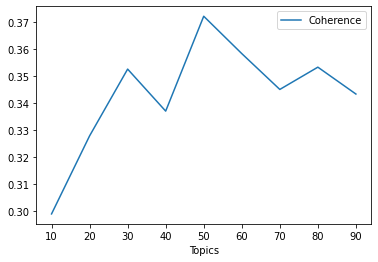

In [41]:
df.plot(x ='Topics', y='Coherence', kind = 'line')
plt.show()

# Finding topic distributions accross df

In [12]:
import pandas as pd
import numpy as np
from gensim import models
from gensim.models.doc2vec import TaggedDocument
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)

Final Test for finding dominant topics etc.

In [13]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import LdaModel

# spacy for lemmatization
#import spacy

# Plotting tools
#import pyLDAvis
#import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

pd.reset_option('display.max_colwidth')
pd.set_option('display.max_colwidth', None)

import os

In [14]:
def Tokinization(document):
    document = "".join(document)
    tokenizer = RegexpTokenizer(r'\w+')
    intermediate = tokenizer.tokenize(document)

    return intermediate

In [20]:
#load LDA model
from gensim.models import LdaModel
from gensim import corpora, models
from gensim.corpora import Dictionary
optimal_model = LdaModel.load('Mommit_Model4.model')
dictionary = corpora.Dictionary.load('MommitDictionary.dict')
corpus = corpora.MmCorpus('MommitCorpusFinal.mm')

In [21]:
optimal_model.print_topic(11)

'0.019*"use" + 0.018*"one" + 0.018*"babi" + 0.012*"like" + 0.011*"cloth" + 0.011*"get" + 0.008*"wear" + 0.007*"buy" + 0.007*"also" + 0.007*"amp"'

In [22]:
topic_table = pd.DataFrame(optimal_model.show_topics(),columns=['Topic Number','KTG'])

In [23]:
topic_table

,Topic Number,KTG
0,14,"0.017*""birth"" + 0.014*""pain"" + 0.013*""babi"" + 0.013*""labor"" + 0.011*""get"" + 0.010*""go"" + 0.010*""hospit"" + 0.010*""time"" + 0.009*""like"" + 0.009*""hour"""
1,35,"0.024*""work"" + 0.011*""would"" + 0.011*""get"" + 0.009*""time"" + 0.009*""make"" + 0.009*""job"" + 0.008*""like"" + 0.008*""home"" + 0.008*""pay"" + 0.008*""go"""
2,7,"0.053*""teeth"" + 0.023*""carrier"" + 0.021*""babi"" + 0.021*""wrap"" + 0.020*""ergo"" + 0.016*""mobi"" + 0.015*""use"" + 0.013*""sling"" + 0.013*""tylenol"" + 0.010*""like"""
3,18,"0.033*""breastfeed"" + 0.023*""feed"" + 0.020*""formula"" + 0.018*""babi"" + 0.015*""breast"" + 0.014*""mom"" + 0.013*""nurs"" + 0.012*""mother"" + 0.012*""breastfe"" + 0.010*""women"""
4,41,"0.015*""time"" + 0.013*""get"" + 0.012*""like"" + 0.010*""hand"" + 0.010*""old"" + 0.009*""bite"" + 0.009*""month"" + 0.008*""shower"" + 0.007*""babi"" + 0.007*""would"""
5,29,"0.028*""rash"" + 0.021*""cream"" + 0.017*""use"" + 0.011*""skin"" + 0.008*""infect"" + 0.008*""get"" + 0.007*""yeast"" + 0.007*""also"" + 0.007*""diaper"" + 0.007*""clear"""
6,9,"0.041*""milk"" + 0.015*""nurs"" + 0.014*""formula"" + 0.014*""breast"" + 0.011*""get"" + 0.011*""babi"" + 0.009*""drink"" + 0.009*""breastfeed"" + 0.008*""feed"" + 0.007*""day"""
7,0,"0.075*""seat"" + 0.054*""car"" + 0.018*""stroller"" + 0.014*""use"" + 0.014*""babi"" + 0.011*""bag"" + 0.011*""one"" + 0.009*""carseat"" + 0.008*""infant"" + 0.007*""face"""
8,17,"0.037*""month"" + 0.031*""solid"" + 0.028*""babi"" + 0.021*""start"" + 0.020*""cereal"" + 0.015*""food"" + 0.011*""rice"" + 0.010*""teeth"" + 0.010*""vomit"" + 0.009*""spit"""
9,15,"0.033*""pictur"" + 0.028*""love"" + 0.024*""littl"" + 0.024*""cute"" + 0.020*""look"" + 0.019*""babi"" + 0.019*""photo"" + 0.012*""beauti"" + 0.012*""ador"" + 0.012*""like"""


In [24]:
def clean_topic_table(LDA_Model=optimal_model,top_terms=40):

    complete = []
    KTG_list = []

    list_of_topics = [i for i in range(0,optimal_model.num_topics)]

    for i in range (0, optimal_model.num_topics):
        clean_KTG = ", ".join([word for word, prop in optimal_model.show_topic(i,topn=top_terms)])
        KTG_list.append(clean_KTG)

    final_list = list(zip(list_of_topics,KTG_list))
    return pd.DataFrame(final_list, columns=['Topic Number','KTG'])

Testing out the cleaning code

In [25]:
KTG_List = clean_topic_table(LDA_Model=optimal_model,top_terms=40)

In [26]:
KTG_List

,Topic Number,KTG
0,0,"seat, car, stroller, use, babi, bag, one, carseat, infant, face, strap, also, get, carri, check, rear, travel, go, need, fit, r, carrier, convert, back, like, har, easi, instal, would, buy, lb, much, realli, old, safeti, good, want, love, mend, graco"
1,1,"constip, prune, miralax, poop, lax, grunt, suppositori, poo, fiber, clump, get, juic, use, soften, hairdress, day, stool, babi, iron, bowel, go, probiot, mustard, one, chewabl, work, good, like, fibr, time, help, make, mouss, diaper, glycerin, also, take, lot, colon, raisin"
2,2,"use, wash, get, water, bath, soap, oil, smell, nose, cold, dri, brush, skin, work, ear, clean, like, spray, also, clear, make, wipe, littl, babi, shampoo, time, help, eczema, bug, everi, one, hair, tri, put, kid, lotion, good, got, deterg, much"
3,3,"sleep, bed, babi, month, night, get, crib, room, time, like, old, use, nurs, one, would, put, first, start, work, week, go, back, co, tri, slept, us, still, wake, also, littl, around, need, realli, son, help, thing, good, think, asleep, swaddl"
4,4,"eye, blue, brown, color, dark, green, look, red, black, colour, blond, light, hair, like, white, grey, turn, darker, bright, hazel, son, pale, daughter, shade, one, gene, born, comic, gray, chang, yellow, skin, genet, babi, pink, get, figurin, littl, husband, month"
5,5,"pump, feed, suppli, milk, babi, nurs, work, get, breast, day, bottl, time, help, tri, formula, nippl, like, much, would, make, latch, month, oz, need, lactat, also, one, breastfeed, enough, first, go, good, use, supplement, eat, week, hour, everi, produc, side"
6,6,"like, kid, get, thing, one, time, say, think, want, go, know, old, would, babi, make, child, year, realli, need, parent, son, someth, peopl, ask, also, talk, way, daughter, littl, tri, good, even, tell, feel, let, see, take, use, said, play"
7,7,"teeth, carrier, babi, wrap, ergo, mobi, use, sling, tylenol, like, one, chew, littl, ring, gum, also, tri, get, love, work, tooth, beco, month, pain, realli, boba, bjorn, frozen, orajel, would, seem, son, front, carri, insert, much, teether, give, first, back"
8,8,"salti, gurgl, turned, kid, like, get, dat, sleep, babi, want, one, go, time, would, thing, see, know, night, also, realli, day, photo, make, need, use, year, tri, child, month, good, feel, even, old, back, much, think, peopl, give, someth, got"
9,9,"milk, nurs, formula, breast, get, babi, drink, breastfeed, feed, day, like, one, much, time, good, also, month, week, tri, think, give, pump, know, breastmilk, would, start, eat, thing, lot, dairi, realli, make, go, supplement, could, need, take, want, enough, help"


In [27]:
KTG_List.to_csv('Mommit_50_topics_KTG.csv')

In [29]:
#First, get a list of posts, one by one
processed_posts = []
CompletePosts = Mommit['clean_body'].apply(list)
#running for the rest of the data
processed_posts = []
#creating threads for each of the users
for post in CompletePosts:
    #Preprocessing each of the threads
    processed_posts.append(Tokinization(post))
       
new_doc2bow = [dictionary.doc2bow(post) for post in processed_posts]
vector = optimal_model.get_document_topics(new_doc2bow)

#create a list of dictioaries for scores relating to optimum LDA
newdictlist = []
for i in range(0, len(vector)):
    newdictlist.append(dict(vector[i]))


topic_bow = pd.DataFrame(newdictlist)

topic_bow.fillna(0, inplace=True)

topic_bow = topic_bow.round(3)

In [30]:
vector[2]

[(6, 0.2634875),
 (11, 0.18217342),
 (31, 0.16473112),
 (35, 0.12040749),
 (45, 0.23704265)]

In [31]:
dict(vector[1])

{0: 0.010027973,
 1: 0.010027973,
 2: 0.010027973,
 3: 0.010027973,
 4: 0.010027973,
 5: 0.010027973,
 6: 0.010027973,
 7: 0.010027973,
 8: 0.010027973,
 9: 0.010027973,
 10: 0.010027973,
 11: 0.010027973,
 12: 0.010027973,
 13: 0.010027973,
 14: 0.010027973,
 15: 0.010027973,
 16: 0.010027973,
 17: 0.010027973,
 18: 0.5086293,
 19: 0.010027973,
 20: 0.010027973,
 21: 0.010027973,
 22: 0.010027973,
 23: 0.010027973,
 24: 0.010027973,
 25: 0.010027973,
 26: 0.010027973,
 27: 0.010027973,
 28: 0.010027973,
 29: 0.010027973,
 30: 0.010027973,
 31: 0.010027973,
 32: 0.010027973,
 33: 0.010027973,
 34: 0.010027973,
 35: 0.010027973,
 36: 0.010027973,
 37: 0.010027973,
 38: 0.010027973,
 39: 0.010027973,
 40: 0.010027973,
 41: 0.010027973,
 42: 0.010027973,
 43: 0.010027973,
 44: 0.010027973,
 45: 0.010027973,
 46: 0.010027973,
 47: 0.010027973,
 48: 0.010027973,
 49: 0.010027973}

In [32]:
# Get dominant topic for each document
dominant_topic = np.argmax(topic_bow.values, axis=1)
topic_bow['dominant_topic'] = dominant_topic

In [33]:
df_topic_distribution = topic_bow['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df = KTG_List.copy()
df_topic_distribution = df_topic_distribution.join(df['KTG'], on='Topic Num')
df_topic_distribution.head()

,Topic Num,Num Documents,KTG
0,31,15473,"mom, kid, feel, get, like, time, go, know, friend, school, help, parent, make, would, need, thing, think, work, realli, talk, even, good, tri, one, child, peopl, year, want, take, group, see, much, lot, also, way, son, find, life, famili, say"
1,15,15387,"pictur, love, littl, cute, look, babi, photo, beauti, ador, like, thank, smile, old, one, pic, month, daughter, girl, get, son, sweet, boy, imgur, year, face, happi, got, first, see, much, great, oh, congrat, day, awesom, birthday, hope, post, make, lol"
2,6,15262,"like, kid, get, thing, one, time, say, think, want, go, know, old, would, babi, make, child, year, realli, need, parent, son, someth, peopl, ask, also, talk, way, daughter, littl, tri, good, even, tell, feel, let, see, take, use, said, play"
3,22,14726,"kid, year, want, get, time, one, old, babi, love, like, think, go, feel, thing, much, realli, would, month, day, first, mom, make, know, famili, son, littl, two, daughter, husband, parent, child, older, way, also, still, sister, even, age, got, good"
4,23,12316,"name, like, want, peopl, think, kid, would, husband, child, know, one, famili, parent, children, get, make, realli, say, mom, love, go, time, way, never, even, mother, thing, also, life, babi, son, feel, year, call, see, daughter, father, dad, differ, girl"


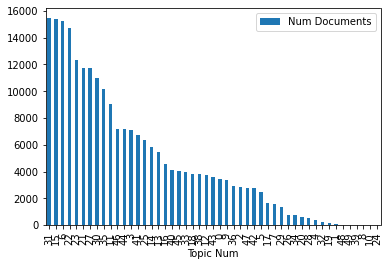

In [34]:
df_topic_distribution.plot.bar(x='Topic Num')

In [39]:
# Styling
#this takes a long time becuase it has to track every row...that is why it is limited to 15 rows...
def color_green(val):
    color = 'blue' if val > .9 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .9 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
#limit to 15 rows
topic_bow_styled = topic_bow.head(15).style.applymap(color_green).applymap(make_bold)
topic_bow_styled

,9,31,51,56,21,34,40,36,43,19,27,30,47,50,45,57,58,39,48,35,1,32,5,4,25,0,17,8,42,18,38,22,24,29,33,44,16,49,10,2,3,6,7,11,12,13,14,15,20,23,26,28,37,41,46,52,53,54,55,59,dominant_topic
0,0.803000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.000000,0.582000,0.175000,0.108000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0.211000,0.284000,0.000000,0.000000,0.442000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.194000,0.644000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.836000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7
6,0.000000,0.000000,0.000000,0.000000,0.143000,0.000000,0.000000,0.000000,0.769000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8
7,0.00

In [36]:
#leave in place and add the columns together
Mommit.reset_index(drop=True, inplace=True)
topic_bow.reset_index(drop=True, inplace=True)
New_MizoFrame = pd.concat([Mommit, topic_bow], axis=1)

In [37]:
New_MizoFrame.head()

,body,clean_body,subreddit,author,created_utc,link_id,name,parent_id,score,Throwaway,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,dominant_topic
0,Love all of these!,love,Mommit,C5Cane,2010-09-04 06:08:56,t3_d9ev7,t1_c0yiueg,t3_d9ev7,2,False,0.01,0.01,0.01,0.01,0.01,0.01,0.010,0.01,0.01,0.01,0.01,0.010,0.010,0.01,0.01,0.51,0.01,0.01,0.01,0.010,0.01,0.010,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.010,0.010,0.010,0.010,0.01,0.010,0.010,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.010,0.010,0.01,0.01,0.01,15
1,Weed.,weed,Mommit,heyfella,2010-09-04 06:55:40,t3_d9g7x,t1_c0yiwzh,t3_d9g7x,2,False,0.01,0.01,0.01,0.01,0.01,0.01,0.010,0.01,0.01,0.01,0.01,0.010,0.010,0.01,0.01,0.01,0.01,0.01,0.01,0.010,0.01,0.010,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.010,0.010,0.010,0.010,0.01,0.509,0.010,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.010,0.010,0.01,0.01,0.01,34
2,"Use the money to buy baby gift baskets ( call it the stork basket) for poor moms.. You can even have these mom-to-be come in, learn something for the care of their baby ( dvds, games, chats) and earn mom points for these baskets",use money buy babi gift basket call stork basket poor mom even mom-to-b come learn someth care babi dvd game chat earn mom point basket,Mommit,aprilwine,2010-09-04 07:13:13,t3_d9g7x,t1_c0yixv6,t3_d9g7x,4,False,0.00,0.00,0.00,0.00,0.00,0.00,0.266,0.00,0.00,0.00,0.00,0.184,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.164,0.000,0.00,0.000,0.119,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.236,0.000,0.00,0.00,0.00,6
3,"Throw out your ""plan"" and just go with it. Sure, you could get pregnant the first month off the IUD, but it usually takes a few months even for perfectly healthy couples. Don't count on your Halloween baby. ""The crazy crying period"" is called postpartum depression and not all new mothers get it. I never did. If you are afraid of getting frustrated with your child and you haven't even gotten pregnant yet, you may want to re-evaluate if you are really ready for a child. All new mothers need a support network. Get out and join moms groups in your area to meet other moms and babies to play with, especially if you are planning to become a SAHM. Also, don't map out a birth plan...none of them go as expected...babies have their own plans.",throw plan go sure could get pregnant first month iud usual take month even perfectli healthi coupl count halloween babi crazi cri period call postpartum depress new mother get never afraid get frustrat child even gotten pregnant yet may want re-evalu realli readi child new mother need support network get join mom group area meet mom babi play especi plan b e sahm also map birth plan none go expect babi plan,Mommit,ChikNugs,2010-09-04 19:52:43,t3_d9mge,t1_c0yk3jj,t3_d9mge,3,False,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.017,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.468,0.023,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.480,0.00,0.00,0.00,46
4,"We are going to start trying to get pregnant in a few months or so. (There is something beyond our control right now causing the fuzzy and slightly unknown time frame.) Besides being afraid of labor, how crazy my mother is and will be, the sudden involvement of family neither of us really see or talk to, and the hormones I'm the most worried about once I give birth and we settle into a routine will I feel like I'm on house arrest? So far I'm making a mental list of things I hope to do with our little one outside of our home. While he/she is still pretty small and not really mobile yet I'm hoping to get into some new mother groups and find a mommy centric yoga class and an infant exercise/bonding class. Once he/she's a toddler then trips to the zoo and family day at the art museum.\n\n\nAfter my sister-in-law had her baby 

In [38]:
New_MizoFrame[(New_MizoFrame[16]>0.9) & (New_MizoFrame.body.str.len()>100)].body

103                                                                                                                                                                                                                                                                                                                                                                       The problem with sex is it's so uncomfortable and my lady bits are so uncooperative anyway that I can't even "get there" on my own! 
512                                                                                                                                                                                                                                                                                     Yes.  A few.  In fact, mine are stretched from pulling on my ears when I got them pierced at the age of 9.  \n\nEDIT:  addition:  I had to get them re-pierced (right above the stretched holes) when I was an adult. 
561       

In [39]:
Mizo_Dominant = New_MizoFrame[['body','dominant_topic']]
df = KTG_List.copy()
df = df.rename(columns={"Topic Number": "dominant_topic"})
Mizo_Dominant = Mizo_Dominant.join(df['KTG'], on='dominant_topic')

In [40]:
Mizo_Dominant[(Mizo_Dominant['dominant_topic']==0) & (Mizo_Dominant['body'].str.len()>100)]

,body,dominant_topic,KTG
30,"As for the stuff, I would get what you can via hand-me down, things like exersaucers, pack &amp; plays, swings, etc. So much of that stuff only gets used for such a short time or not at all. Neither of my kids like swings, for example, but both love the exersaucers.\n\nDon't cheap out on the car seats though. I found that the better brands, Britax, Recaro, Sunshine Kids, are worth it for ease of installation and use. Nothing is more annoying than having your straps always get twisted, or not being able to get them tight enough. Something like 80% of carseats are improperly installed, so find a seat check (ask at Baby's R Us) and install and get your seat checked before the baby comes.\n\nRear-facing is much much safer than forward facing, even after the 20lb/1 year mark listed on the infant ""bucket"" seats. Look for a convertible seat that has a high rear-facing weight limit for once your baby out-grows the infant seat.",0,"seat, car, stroller, use, babi, bag, one, carseat, infant, face, strap, also, get, carri, check, rear, travel, go, need, fit, r, carrier, convert, back, like, har, easi, instal, would, buy, lb, much, realli, old, safeti, good, want, love, mend, graco"
39,"You can usually check with the local fire or police department - most usually have someone on staff who went through a very through class on installing car seats properly.\n\nAs Babies R Us has been mentioned - one thing we loved about them is that they are quite happy to take things down off the display so you can try them out, and see how easy they are to set up &amp; take down. They'll even let you take the display car seats out to your vehicle to see how they'll fit.",0,"seat, car, stroller, use, babi, bag, one, carseat, infant, face, strap, also, get, carri, check, rear, travel, go, need, fit, r, carrier, convert, back, like, har, easi, instal, would, buy, lb, much, realli, old, safeti, good, want, love, mend, graco"
48,I will second the better brands of car seats. Britax and Sunshine Kids are well worth the price. We have used seats from both manufacturers and loved them.,0,"seat, car, stroller, use, babi, bag, one, carseat, infant, face, strap, also, get, carri, check, rear, travel, go, need, fit, r, carrier, convert, back, like, har, easi, instal, would, buy, lb, much, realli, old, safeti, good, want, love, mend, graco"
50,"I loved my sling when my daughter was a baby. I had a hotsling (www.hotslings.com.) It is super versatile and goes from infant (cradle position through toddler with a hip-carry. We have a Maclaren stroller and also really love it. Don't waste your money on a travel system. They are really bulky and heavy. Next time around we plan to buy a snap n go stroller frame to pop the infant car seat into. Once the baby is out of the snap n go, I will move it to the Maclaren. I bought about 5 strollers with my daughter and the Mac is by far my favorite.",0,"seat, car, stroller, use, babi, bag, one, carseat, infant, face, strap, also, get, carri, check, rear, travel, go, need, fit, r, carrier, convert, back, like, har, easi, instal, would, buy, lb, much, realli, old, safeti, good, want, love, mend, graco"
244,"Quieter, and you don't have to lug around diaper bags and strollers!! Just your bloated pregnant body.",0,"seat, car, stroller, use, babi, bag, one, carseat, infant, face, strap, also, get, carri, check, rear, travel, go, need, fit, r, carrier, convert, back, like, har, easi, instal, would, buy, lb, much, realli, old, safeti, good, want, love, mend, graco"
...,...,...,...
232631,My friend was concerned about this and contacted the manufacturer of her car seat. They sent her covers that are approved for her car seat.,0,"seat, car, stroller, use, babi, bag, one, carseat, infant, face, strap, also, get, carri, check, rear, travel, go, need, fit, r, carrier, convert, back, like, har, easi, instal, would, buy, lb, much, realli, old, safeti, good, want, love, mend, graco"
232632,We have the britax frontier clic

Normalizing the scores, so that we can always use 0.9 as the perc...

In [41]:
topic_bow_norm=(topic_bow-topic_bow.mean())/topic_bow.std()

In [42]:
topic_bow_norm['dominant_topic'] = topic_bow_norm.idxmax(axis=1)

In [43]:
#leave in place and add the columns together
Mommit.reset_index(drop=True, inplace=True)
topic_bow_norm.reset_index(drop=True, inplace=True)
New_MizoFrame_norm = pd.concat([Mommit, topic_bow_norm], axis=1)

In [44]:
New_MizoFrame_norm.head()

,body,clean_body,subreddit,author,created_utc,link_id,name,parent_id,score,Throwaway,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,dominant_topic
0,Love all of these!,love,Mommit,C5Cane,2010-09-04 06:08:56,t3_d9ev7,t1_c0yiueg,t3_d9ev7,2,False,-0.010166,0.760897,-0.039754,-0.147043,0.255991,-0.005890,-0.277182,0.043539,3.591742,-0.045083,4.016826,-0.180989,-0.072737,-0.121148,-0.10627,2.683827,-0.094767,0.030133,-0.078273,0.416326,0.138001,-0.219104,-0.256551,-0.233926,3.812492,-0.148274,0.162639,-0.221905,0.143396,0.063723,-0.217231,-0.266900,0.303381,-0.082388,0.153584,-0.209107,-0.031843,4.131225,-0.085438,1.994422,-0.072006,-0.148483,-0.029443,-0.059016,-0.150161,-0.092876,-0.151410,-0.048582,1.143149,1.979599,37
1,Weed.,weed,Mommit,heyfella,2010-09-04 06:55:40,t3_d9g7x,t1_c0yiwzh,t3_d9g7x,2,False,-0.010166,0.760897,-0.039754,-0.147043,0.255991,-0.005890,-0.277182,0.043539,3.591742,-0.045083,4.016826,-0.180989,-0.072737,-0.121148,-0.10627,-0.282535,-0.094767,0.030133,-0.078273,0.416326,0.138001,-0.219104,-0.256551,-0.233926,3.812492,-0.148274,0.162639,-0.221905,0.143396,0.063723,-0.217231,-0.266900,0.303381,-0.082388,12.856009,-0.209107,-0.031843,4.131225,-0.085438,1.994422,-0.072006,-0.148483,-0.029443,-0.059016,-0.150161,-0.092876,-0.151410,-0.048582,1.143149,1.979599,34
2,"Use the money to buy baby gift baskets ( call it the stork basket) for poor moms.. You can even have these mom-to-be come in, learn something for the care of their baby ( dvds, games, chats) and earn mom points for these baskets",use money buy babi gift basket call stork basket poor mom even mom-to-b come learn someth care babi dvd game chat earn mom point basket,Mommit,aprilwine,2010-09-04 07:13:13,t3_d9g7x,t1_c0yixv6,t3_d9g7x,4,False,-0.151348,-0.067122,-0.174516,-0.227210,-0.106547,-0.151446,1.238869,-0.135221,-0.092867,-0.169689,-0.103734,1.162616,-0.187342,-0.216615,-0.19487,-0.341862,-0.201134,-0.142787,-0.193134,-0.081857,-0.134034,-0.285646,-0.315430,-0.297904,-0.098547,-0.238164,-0.110403,-0.286285,-0.136187,-0.125927,-0.286767,0.613994,-0.095368,-0.191974,-0.100974,0.545561,-0.163720,-0.103501,-0.200508,-0.076823,-0.187045,-0.237413,-0.162676,-0.174938,-0.230459,2.533308,-0.235745,-0.186312,-0.072132,-0.069264,45
3,"Throw out your ""plan"" and just go with it. Sure, you could get pregnant the first month off the IUD, but it usually takes a few months even for perfectly healthy couples. Don't count on your Halloween baby. ""The crazy crying period"" is called postpartum depression and not all new mothers get it. I never did. If you are afraid of getting frustrated with your child and you haven't even gotten pregnant yet, you may want to re-evaluate if you are really ready for a child. All new mothers need a support network. Get out and join moms groups in your area to meet other moms and babies to play with, especially if you are planning to become a SAHM. Also, don't map out a birth plan...none of them go as expected...babies have their own plans.",throw plan go sure could get pregnant first month iud usual take month even perfectli healthi coupl count halloween babi crazi cri period call postpartum depress new mother get never afraid get frustrat child even gotten pregnant yet may want re-evalu realli readi child new mother need support network get join mom group area meet mom babi play especi plan b e sahm also map birth plan none go expect babi plan,Mommit,ChikNugs,2010-09-04 19:52:43,t3_d9mge,t1_c0yk3jj,t3_d9mge,3,False,-0.151348,-0.067122,-0.174516,-0.227210,-0.106547,-0.151446,-0.336402,-0.135221,-0.092867,-0.169689,-0.103734,-0.258208,-0.187342,-0.216615,-0.19487,-0.341862,-0.201134,-0.142787,-0.193134,0.765054,-0.134034,-0.285646,-0.315430,-0.297904,-0.098547,-0.238164,-0.110403,-0.286285,-0.136187,-0.125927,-0.286767,2.352903,0.821755,-0.191974,-0.100974,-0.278343,-0.163720,-0.103501,-0.200508,-0.076823,-0.187045,-0.237413,-0.162676,-0.17493

In [45]:
New_MizoFrame_norm[(New_MizoFrame_norm[22]>4) & (New_MizoFrame_norm.body.str.len()>200)].body

18        Just go with the flow.  As for the pre-baby training... Don't worry about it.  When you become a mom, nature kicks in.  It's absolutely amazing.  Spacing them out... that's a personal preference.  My kids are 19 months apart, different sexes, and fight like cats and dogs.  But they're each other's greatest ally.  It's not so hard managing two small children.  It just becomes how things are and you go with the flow.  But I know people who have waited a few years between kids and prefer it that way.  The older child can have a small role in caring for the baby and teaching it new things as it gets older.  You'll know more about what you want in that area when you have your first.  One of my sisters had a baby and when he was a year old, she immediately started wanting another little baby.  My other sister had a little girl and doesn't want to share the time she has with her daughter with another baby for a few years.  It just all depends.  Good luck!  And stop stressing!!
58   

In [46]:
#leave in place and add the columns together
Mizo_Dominant_norm = New_MizoFrame[['body','dominant_topic']]
df = KTG_List.copy()
df = df.rename(columns={"Topic Number": "dominant_topic"})
Mizo_Dominant_norm = Mizo_Dominant_norm.join(df['KTG'], on='dominant_topic')

In [47]:
Mizo_Dominant_norm.head()

,body,dominant_topic,KTG
0,Love all of these!,15,"pictur, love, littl, cute, look, babi, photo, beauti, ador, like, thank, smile, old, one, pic, month, daughter, girl, get, son, sweet, boy, imgur, year, face, happi, got, first, see, much, great, oh, congrat, day, awesom, birthday, hope, post, make, lol"
1,Weed.,34,"time, day, month, babi, wine, get, go, like, feel, mom, one, drink, alcohol, husband, littl, take, would, week, kid, night, old, work, make, love, thing, glass, sleep, year, realli, first, much, start, want, think, even, still, need, got, coffe, say"
2,"Use the money to buy baby gift baskets ( call it the stork basket) for poor moms.. You can even have these mom-to-be come in, learn something for the care of their baby ( dvds, games, chats) and earn mom points for these baskets",6,"like, kid, get, thing, one, time, say, think, want, go, know, old, would, babi, make, child, year, realli, need, parent, son, someth, peopl, ask, also, talk, way, daughter, littl, tri, good, even, tell, feel, let, see, take, use, said, play"
3,"Throw out your ""plan"" and just go with it. Sure, you could get pregnant the first month off the IUD, but it usually takes a few months even for perfectly healthy couples. Don't count on your Halloween baby. ""The crazy crying period"" is called postpartum depression and not all new mothers get it. I never did. If you are afraid of getting frustrated with your child and you haven't even gotten pregnant yet, you may want to re-evaluate if you are really ready for a child. All new mothers need a support network. Get out and join moms groups in your area to meet other moms and babies to play with, especially if you are planning to become a SAHM. Also, don't map out a birth plan...none of them go as expected...babies have their own plans.",46,"pregnanc, pregnant, week, babi, get, first, time, like, birth, go, one, month, would, want, day, feel, got, realli, help, also, know, take, much, even, thing, year, make, sex, tri, born, think, still, start, lot, second, good, two, could, work, back"
4,"We are going to start trying to get pregnant in a few months or so. (There is something beyond our control right now causing the fuzzy and slightly unknown time frame.) Besides being afraid of labor, how crazy my mother is and will be, the sudden involvement of family neither of us really see or talk to, and the hormones I'm the most worried about once I give birth and we settle into a routine will I feel like I'm on house arrest? So far I'm making a mental list of things I hope to do with our little one outside of our home. While he/she is still pretty small and not really mobile yet I'm hoping to get into some new mother groups and find a mommy centric yoga class and an infant exercise/bonding class. Once he/she's a toddler then trips to the zoo and family day at the art museum.\n\n\nAfter my sister-in-law had her baby she turned into an avid Facebook user. I believe it was her way of staying in contact with her friends and filling the void of not being away from home everyday interacting with a lot people. Maybe you and your friends already use Facebook. As long as you don't overload your updates about your little one it seems like a nice way to stay in the loop. Emails and texts just feel like they need to be responded to too quickly and sometimes phone calls come at the worst time possible. \n\n\nI hope everything works out so your baby is born in October. I was sort of hoping to not be in my second or third trimester in the summer, but the way things are going we are going to have a fall or winter baby, too. Any thoughts on being pregnant during the summer? The heat and humidity already zaps all my energy to begin with. So, I can't imagine being 25 pounds heavier and short of breath when the heat index is 100.",31,"mom, kid, feel, get, like, time, go, know, friend, school, help, parent, make, would, need, thing, think, work, realli, talk, even, good, tri, one, child, peopl, year, want, take, group, see, muc

Trying Dominant topics after normalization...

In [48]:
df_topic_distribution_norm = topic_bow_norm['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution_norm.columns = ['Topic Num', 'Num Documents']
df = KTG_List.copy()
df_topic_distribution_norm = df_topic_distribution_norm.join(df['KTG'], on='Topic Num')
df_topic_distribution_norm.head()

,Topic Num,Num Documents,KTG
0,31,11937,"mom, kid, feel, get, like, time, go, know, friend, school, help, parent, make, would, need, thing, think, work, realli, talk, even, good, tri, one, child, peopl, year, want, take, group, see, much, lot, also, way, son, find, life, famili, say"
1,22,11047,"kid, year, want, get, time, one, old, babi, love, like, think, go, feel, thing, much, realli, would, month, day, first, mom, make, know, famili, son, littl, two, daughter, husband, parent, child, older, way, also, still, sister, even, age, got, good"
2,6,10758,"like, kid, get, thing, one, time, say, think, want, go, know, old, would, babi, make, child, year, realli, need, parent, son, someth, peopl, ask, also, talk, way, daughter, littl, tri, good, even, tell, feel, let, see, take, use, said, play"
3,15,10434,"pictur, love, littl, cute, look, babi, photo, beauti, ador, like, thank, smile, old, one, pic, month, daughter, girl, get, son, sweet, boy, imgur, year, face, happi, got, first, see, much, great, oh, congrat, day, awesom, birthday, hope, post, make, lol"
4,23,9871,"name, like, want, peopl, think, kid, would, husband, child, know, one, famili, parent, children, get, make, realli, say, mom, love, go, time, way, never, even, mother, thing, also, life, babi, son, feel, year, call, see, daughter, father, dad, differ, girl"


In [49]:
df_topic_distribution_norm.head(15)

,Topic Num,Num Documents,KTG
0,31,11937,"mom, kid, feel, get, like, time, go, know, friend, school, help, parent, make, would, need, thing, think, work, realli, talk, even, good, tri, one, child, peopl, year, want, take, group, see, much, lot, also, way, son, find, life, famili, say"
1,22,11047,"kid, year, want, get, time, one, old, babi, love, like, think, go, feel, thing, much, realli, would, month, day, first, mom, make, know, famili, son, littl, two, daughter, husband, parent, child, older, way, also, still, sister, even, age, got, good"
2,6,10758,"like, kid, get, thing, one, time, say, think, want, go, know, old, would, babi, make, child, year, realli, need, parent, son, someth, peopl, ask, also, talk, way, daughter, littl, tri, good, even, tell, feel, let, see, take, use, said, play"
3,15,10434,"pictur, love, littl, cute, look, babi, photo, beauti, ador, like, thank, smile, old, one, pic, month, daughter, girl, get, son, sweet, boy, imgur, year, face, happi, got, first, see, much, great, oh, congrat, day, awesom, birthday, hope, post, make, lol"
4,23,9871,"name, like, want, peopl, think, kid, would, husband, child, know, one, famili, parent, children, get, make, realli, say, mom, love, go, time, way, never, even, mother, thing, also, life, babi, son, feel, year, call, see, daughter, father, dad, differ, girl"
5,21,9849,"babi, get, need, like, go, feel, time, know, would, take, thing, child, think, help, make, care, one, mother, even, husband, want, right, realli, peopl, mom, much, leav, way, could, day, say, happen, work, someon, give, tri, parent, see, better, first"
6,30,9507,"day, get, time, work, home, go, take, babi, like, kid, week, hour, husband, hous, thing, one, make, clean, also, play, help, need, would, mom, even, old, realli, stay, daycar, much, around, good, month, year, watch, lot, dog, love, everi, know"
7,27,9396,"sleep, night, time, get, cri, nap, hour, babi, go, month, wake, bed, day, tri, back, would, work, start, need, minut, like, put, asleep, one, let, still, help, know, everi, bedtim, routin, old, around, much, realli, room, good, thing, littl, week"
8,35,8709,"work, would, get, time, make, job, like, home, pay, go, money, one, year, want, know, kid, think, need, also, good, much, realli, peopl, take, could, back, famili, month, thing, child, school, find, look, care, live, use, stay, daycar, lot, help"
9,11,7212,"use, one, babi, like, cloth, get, wear, buy, also, amp, love, would, realli, go, got, good, thing, month, great, store, look, size, need, shirt, blanket, make, put, bought, littl, find, stuff, nice, lot, much, still, fit, even, never, bra, want"


In [50]:
df_topic_distribution_norm.to_csv('dominant_topics_50_Mommit.csv')

Renaming columns...

In [8]:
body_list = Daddit[Daddit.body.str.contains(r'(?:\s|^)mee(?:\s|$)')].body

In [10]:
abbr = 'NFL'

item = abbr + '$' 

Daddit[Daddit['body'].str.match(item)]

,archived,author,author_flair_css_class,author_flair_text,body,controversiality,created_utc,distinguished,downs,edited,gilded,link_id,name,parent_id,removal_reason,score,score_hidden,subreddit,ups,Throwaway_User,Throwaway_Body,Throwaway,clean_body,Picky_Eaters,Sleep_Training,Nursing,Dad_Support,Parenting_Jokes,Topic_5,Smoke_Drugs_Alcohol,Topic_7,College,Grandparents,Naked_Privacy,Allergy_Sick_Runny_Nose,Child_Food,Parenting_Groups_Religious,Father_Role,Toys_Playing,Diapers,Topic_17,After_First_Child,Child_Activity,Baby_Gear,Psych_Stress,Parent_Gear,Child_Autonomy_Str_Danger,Circumcision,Hair_Care,Vaccines,Teen_Changes,BabyProof_Accidents,Swimming,Moderator,School,Male_Norms,Birth,Joke,Dogs,Diagnosing_Disorders,Cost_Financial_Planning,Topic_38,Topic_39,Children_Socializing,Santa,Work_Parenting_Schedule,Topic_43,Religious_Social_Beleifs,CPS_Child_Abuse,Bathtime_Sleep_Routine,Media,Tantrum_Mngmnt_Discipline,Topic 49,Topic 50,Topic 51,Puppy,Topic_53,Parenting_Pregnany_Hardships_Experiences,Potty_Training,Language_Reading,Music,Edu_Phil,Congrats,Challenging_Behavior,Managing_Grief_Unexpected_Pregnancy,Doors_Child Accidents,Topic_63,Family_Car,Bully,Thanks_Support,Parenting_Nature,Skin_Care_Cloth,Child_Support_CPS


In [143]:
#renaming columns after discovering the nature of topics
column_indices = topic_bow.columns
new_names = ['Topic_'+ str(i) for i in optimal_model.num_topics]
old_names = topic_bow[column_indices]
topic_bow.rename(columns=dict(zip(old_names, new_names)), inplace=True)

TypeError: 'int' object is not iterable